# Homework No. 1

The following jupyter notebook contains the results of the first homework for the course: "Data Visualization" and was created by Franz Just.

To execute the jupyter notebook, the following libraries are required to install:
- pandas
- seaborn
- matplotlib

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

The dataset [1] which is going to be analyzed, contains information about customers of a company. This includes information in terms of the customer profile, preferences as well as sale channels. Besides that, details about corresponding marketing campaigns are given.  

Marketing, is among other things, one of the key factors for a successfull company. In order to be successfull, one the most important thing is to know your target group and the way how to approach them. The following dataset gives insights about the customer themself and enables companies to target them.

The dataset is a great example of how proper data analysation and visualization can enable direct business insights. Getting to know the customer, discovering correlations or cluster customers are just a few examples which can be achieved through this data.  

Due to the complexity of the original dataset, a few columns were removed. The structure of the final dataset is as follow:

    - "ID:  Customer's unique identifier
    - Year_Birth:  Customer's birth year
    - Education:  Customer's education level
    - Marital_Status:  Customer's marital status
    - Income:  Customer's yearly household income
    - Kidhome:  Number of children in customer's household
    - Dt_Customer:  Date of customer's enrollment with the company
    - Recency:  Number of days since customer's last purchase
    - NumDealsPurchases:  Number of purchases made with a discount
    - NumWebPurchases:  Number of purchases made through the company's web site
    - NumCatalogPurchases:  Number of purchases made using a catalogue
    - NumStorePurchases:  Number of purchases made directly in stores
    - NumWebVisitsMonth:  Number of visits to company's web site in the last month
    - Country:  Customer's location"[1]
    
The dataset was published by **Jack Daoud** on **Kaggle** and can be found through the following **URL:** https://www.kaggle.com/jackdaoud/marketing-data.

In [2]:
df = pd.read_csv("dataset.csv", index_col = None)
df = df.drop(columns=['Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   NumDealsPurchases    2240 non-null   int64 
 9   NumWebPurchases      2240 non-null   int64 
 10  NumCatalogPurchases  2240 non-null   int64 
 11  NumStorePurchases    2240 non-null   int64 
 12  NumWebVisitsMonth    2240 non-null   int64 
 13  Country              2240 non-null   object
dtypes: int64(9), object(5)
memory usage: 245.1+ KB


The output above gives an overview about the key information of the dataset. It can be seen that most of the data is either of type int or string/object. There are no null values.

**Problem: Data preprocessing - space in column name: " Income "**

In [3]:
df = df.rename(columns={" Income ": "Income"})

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,6/16/14,0,1,4,4,6,1,SP
1,1,1961,Graduation,Single,"$57,091.00",0,6/15/14,0,1,7,3,7,5,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,5/13/14,0,1,3,2,5,2,US
3,1386,1967,Graduation,Together,"$32,474.00",1,5/11/14,0,1,1,0,2,7,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,4/8/14,0,2,3,1,2,7,SP


**Problem: missleading/missing information - Education & Marital_Status**

For instance, what is exactly meant by the Education Level "Graduation"?

In [5]:
df.groupby(['Education']).size()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

In [6]:
df.groupby(['Marital_Status']).size()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

Further data preprocessing could be required to, for instance, clean the dataset and avoid missunderstandings.

## 1. Question: How many purchases were made with a discount?

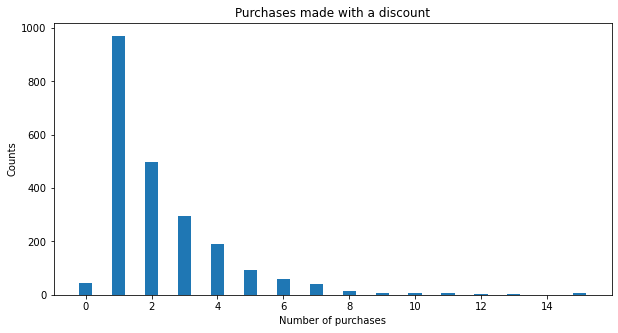

In [7]:
dis = df.groupby(['NumDealsPurchases']).size()
dis = dict(dis) 
dis_amount = list(dis.keys())
dis_counts = list(dis.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(dis_amount, dis_counts, width = 0.4)
 
plt.xlabel("Number of purchases")
plt.ylabel("Counts")
plt.title("Purchases made with a discount")
plt.show()

**Results:** Based on the diagram, it can be seen that most of the customers had 1 purchase with a discount.

## 2. Question: How is the Income of the customers distributed?

**Problem: Income is type string/object, needs to be converted.**

In [8]:
print("Income data type before conversion: " + str(df.dtypes['Income']))
df["Income"] = df["Income"].replace("[$,]", "", regex=True).astype(float)
print("Income data type after conversion: " + str(df.dtypes['Income']))

Income data type before conversion: object
Income data type after conversion: float64


**Problem: null values in column "Income".**

In [9]:
print("Number of null values before data processing: " + str(df["Income"].isnull().sum()))
df = df.dropna()
print("Number of null values after data processing: " + str(df["Income"].isnull().sum()))

Number of null values before data processing: 24
Number of null values after data processing: 0


Text(0.5, 6.79999999999999, 'Income in US-Dollar')

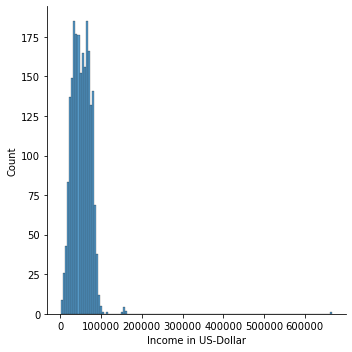

In [10]:
sns.displot(df.Income)
plt.xlabel("Income in US-Dollar")

**Problem: outliers distort the visualization.**

In [11]:
# The following approach removes all the Incomes equal or greater 150 000 Dollar. 
Income = df["Income"].apply(lambda x: x if (x < 150000) else None)

Text(0.5, 6.79999999999999, 'Income in US-Dollar')

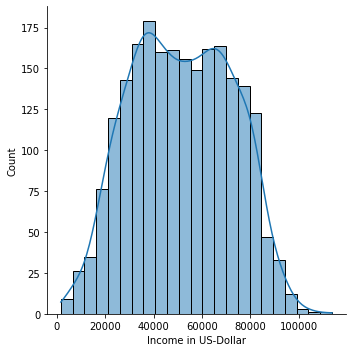

In [12]:
sns.displot(Income,kde=True)
plt.xlabel("Income in US-Dollar")

**Results:** The graphs have shown that most of the yearly Incomes lie between 0 and 100 000 Dollar. It can be seen that the dataset contains several outliers, which were removed by setting the threshold to 150 000 Dollar. The income distribution has a similar shape like a gaussian distribution. 

## 3. Question: Which sale channel is mostly used by the customers?

Text(0.5, 6.79999999999999, 'Number of Purchases')

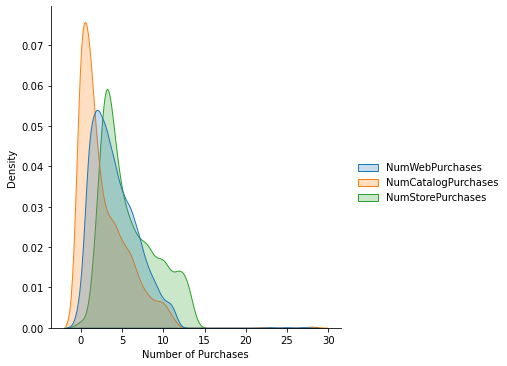

In [13]:
sns.displot(data=df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]], kind="kde", fill=True)
plt.xlabel("Number of Purchases")

Text(0, 0.5, 'Number of Purchases')

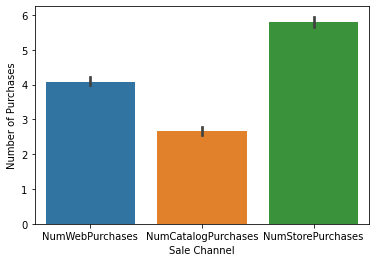

In [14]:
sns.barplot(data=df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]], ci=95)
plt.xlabel("Sale Channel")
plt.ylabel("Number of Purchases")

**Note:** confidence interval = 95%.

**Result:** The distribution of the different sale channels can be analysed by the presented graphs. Thereby it gets clear, that on average the number of store purchases is bigger then on web or from the catalogue. 

## Source

[1] Jack Daoud; Marketing Analytics; https://www.kaggle.com/jackdaoud/marketing-data

-----------------------------------------------------------
Author: Franz Just